In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
import logging
from qiskit.circuit import Gate
from qiskit import transpile
from qiskit.transpiler import InstructionProperties
from qiskit_utilities import (
    save_job_data,
    setup_logger,
    retrieve_expdata,
    get_cr_schedule,
    iy_drag_calibration,
    get_default_cr_params,
    read_calibration_data,
    parallel_cr_pulse_calib,
    parallel_iy_drag_calibration,
    create_echoed_cr_schedule
)
token = "REPLACE WITH IBM TOKEN"
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(
    token=token,
    channel="ibm_quantum"
)
backend = service.backend("ibm_rensselaer")
import numpy as np
from numpy import pi
from copy import deepcopy

In [3]:
setup_logger(filename=None, level=logging.INFO, stdout=True)
logger = logging.getLogger("qiskit_utilities")

2024-11-07 14:33:51,313, MainThread 
INFO Logger initialized successfully.


In [4]:
# qubit_pairs = [[0,1], [3,4], [7,6], [10, 9], [17, 12], [26, 16], [19, 18], [21, 22]]
qubit_pairs = [[0, 1]]
initial_calibration_data_lst = []
for qubit_pair in qubit_pairs:
    QUBIT_C, QUBIT_T = qubit_pair[0], qubit_pair[1]
    cr_config, ix_config = get_default_cr_params(backend, qubit_pair[0], qubit_pair[1])
    f0 = backend.properties().frequency(QUBIT_C)
    f1 = backend.properties().frequency(QUBIT_T)
    a0 = backend.properties().qubit_property(QUBIT_C)["anharmonicity"][0]
    a1 = backend.properties().qubit_property(QUBIT_T)["anharmonicity"][0]
    duration = backend.defaults().instruction_schedule_map.get("ecr", (QUBIT_C, QUBIT_T)).duration/16 * 4
    params = {
        "order": "1",
        "t_r": 10,
        "drag_type": False,
        "duration": duration,
        "amp": cr_config["amp"],
        "angle": cr_config["angle"],
        "Delta": (backend.properties().frequency(QUBIT_C) - backend.properties().frequency(QUBIT_T)) * 1.0e-9 * 2 * pi,
        "a1": 2 * pi * backend.properties().qubit_property(QUBIT_C)["anharmonicity"][0] * 1.0e-9,
        "drag_scale": [1., 1., 1.]
    }
    cr_params = deepcopy(params)
    ix_params = deepcopy(params)
    ix_params["amp"] = ix_config["amp"]
    ix_params["angle"] = ix_config["angle"]
    ix_params["order"] = "2"
    initial_calibration_data = {
        "cr_params": cr_params,
        "ix_params": ix_params,
        "frequency_offset": 0.,
    }
    initial_calibration_data_lst.append(initial_calibration_data)
cr_times = 16 * np.arange(16, duration + 16, duration // 30, dtype=int)
gate_name = "CR-Hann-tr10"

2024-10-25 18:17:56,994, MainThread 
INFO Target IX / ZX ratio: 0.0
2024-10-25 18:17:56,995, MainThread 
INFO 

CR calibration round 1: 
2024-10-25 18:18:04,986, MainThread 
INFO Generated 192 tomography circuits.
/scr/dataset/yuchen/miniforge3/envs/calib/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/scr/dataset/yuchen/miniforge3/envs/calib/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
2024-10-25 18:18:33,180, MainThread 
INFO CR-tomo: cwdy1tz0r6b0008p0rd0cwdy1w740e0000887xq0cwdy1wz31we00087b5wgcwdy1xqmptp000826hqg
backend: <IBMBackend('ibm_rensselaer')>
qubit_pairs: [[0, 1]]
cr_times: [  256   640  1024  1408  1792  2176  2560  

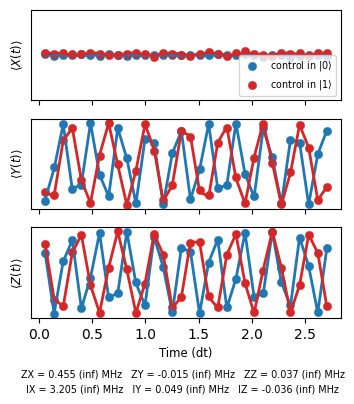

2024-10-25 18:23:26,503, MainThread 
INFO Tomography results for tomo_id1:
{'IX': 3.204658175857788, 'IY': 0.04866778163801748, 'IZ': -0.03553165998754154, 'ZX': 0.45462749664731317, 'ZY': -0.014668765475303543, 'ZZ': 0.036970638473059404}

2024-10-25 18:23:26,506, MainThread 
INFO Frequency offset is updated to 17765.82999377077 Hz
2024-10-25 18:23:26,507, MainThread 
INFO Remaining dominant error: IX: 3.204658175857788 MHz

2024-10-25 18:23:26,507, MainThread 
INFO Omega[GHz]/amp: 0.08372155510026139
2024-10-25 18:23:26,508, MainThread 
INFO Probe amp shift [MHz]for Qubits {qubits[i]}:-3.204658175857788 MHz
2024-10-25 18:23:26,508, MainThread 
INFO Probe amp shift length 1
2024-10-25 18:23:26,509, MainThread 
INFO Probe amp shift [-0.03827757585271828]
2024-10-25 18:23:26,879, MainThread 
INFO Generated 192 tomography circuits.
2024-10-25 18:23:55,944, MainThread 
INFO CR-tomo: cwdy4b9mptp000826j50cwdy4c90r6b0008p0rtgcwdy4d19r49g0085hc8gcwdy4ds9r49g0085hc90
backend: <IBMBackend('ibm_

finished tomo_id2


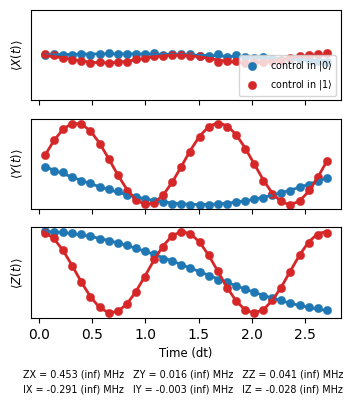

2024-10-25 18:29:32,597, MainThread 
INFO [{'IX': -0.2908603113138298, 'IY': -0.0030008924792826568, 'IZ': -0.027825239852589726, 'ZX': 0.452863141793648, 'ZY': 0.016119565152306566, 'ZZ': 0.04139371109169843}]
2024-10-25 18:29:32,597, MainThread 
INFO Estimated drive scale: 
(0.09131570228871658+0.0016297071120516691j)
(0.09133024378458973+0j)
0.017845059241992475
2024-10-25 18:29:32,598, MainThread 
INFO Finished qubits: []
2024-10-25 18:29:32,603, MainThread 
INFO CR calibration data saved for qubits: [0, 1]
2024-10-25 18:29:32,604, MainThread 
INFO 

CR calibration round 2: 


line 3267, start updating based on tomo_id2
line 3287 17765.82999377077


2024-10-25 18:29:33,145, MainThread 
INFO Generated 192 tomography circuits.
2024-10-25 18:30:19,412, MainThread 
INFO CR-tomo: cwdy78d40e0000887yqgcwdy79n31we00087b74gcwdy7bdmptp000826jwgcwdy7dx0r6b0008p0sd0
backend: <IBMBackend('ibm_rensselaer')>
qubit_pairs: [[0, 1]]
cr_times: [  256   640  1024  1408  1792  2176  2560  2944  3328  3712  4096  4480
  4864  5248  5632  6016  6400  6784  7168  7552  7936  8320  8704  9088
  9472  9856 10240 10624 11008 11392 11776 12160]
shots: 2048
cr_params: [{'order': '1', 't_r': 10, 'drag_type': False, 'duration': 12160, 'amp': 0.29948044899261234, 'angle': 1.5534093304628915, 'Delta': 1.0877297995943767, 'a1': -1.92970753159043, 'drag_scale': [1.0, 1.0, 1.0]}]
ix_params: [{'order': '2', 't_r': 10, 'drag_type': False, 'duration': 12160, 'amp': 0.003582935761477238, 'angle': 0.0030647307236930125, 'Delta': 1.0877297995943767, 'a1': -1.92970753159043, 'drag_scale': [1.0, 1.0, 1.0]}]
x_gate_ix_params: [None]
frequency_offset: [17765.82999377077]
dt: 

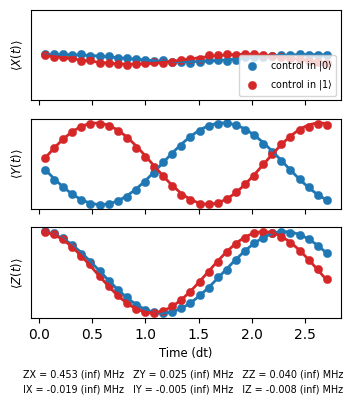

2024-10-25 18:33:56,905, MainThread 
INFO Tomography results for tomo_id1:
{'IX': -0.01949507449154641, 'IY': -0.005031503786827266, 'IZ': -0.007987753151471889, 'ZX': 0.45298881488728426, 'ZY': 0.025499320446865936, 'ZZ': 0.0396528026931274}

2024-10-25 18:33:56,906, MainThread 
INFO no need to update frequency offset for qubit [0, 1] at round 2
2024-10-25 18:33:56,906, MainThread 
INFO Remaining dominant error: ZY: 0.025499320446865936 MHz

2024-10-25 18:33:56,907, MainThread 
INFO Omega[GHz]/amp: 0.09133024378458973
2024-10-25 18:33:56,907, MainThread 
INFO Probe amp shift [MHz]for Qubits [0, 1]: 0.1 MHz
2024-10-25 18:33:56,907, MainThread 
INFO Probe amp shift length 1
2024-10-25 18:33:56,908, MainThread 
INFO Probe amp shift [0.0010949275492558484]
2024-10-25 18:33:57,453, MainThread 
INFO Generated 192 tomography circuits.
2024-10-25 18:34:29,186, MainThread 
INFO CR-tomo: cwdy98dmptp000826kbgcwdy99n9r49g0085hdngcwdy9b5mptp000826kd0cwdy9cn0r6b0008p0sw0
backend: <IBMBackend('ibm_r

finished tomo_id2


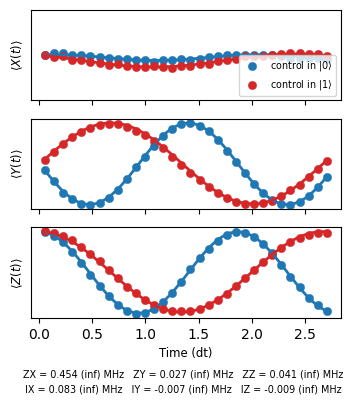

2024-10-25 18:38:44,519, MainThread 
INFO [{'IX': 0.08259222102470003, 'IY': -0.007007977345880865, 'IZ': -0.008762574785727248, 'ZX': 0.45381918524559123, 'ZY': 0.02697142042115778, 'ZZ': 0.040739196651642606}]
2024-10-25 18:38:44,520, MainThread 
INFO Estimated drive scale: 
(0.0932416701949884-0.0015193650911535868j)
(0.093254048335883-2.220151316801299e-19j)
-0.01629347300731282
2024-10-25 18:38:44,520, MainThread 
INFO Finished qubits: []
2024-10-25 18:38:44,524, MainThread 
INFO CR calibration data saved for qubits: [0, 1]
2024-10-25 18:38:44,525, MainThread 
INFO 

CR calibration round 3: 


line 3267, start updating based on tomo_id2
line 3287 17765.82999377077


2024-10-25 18:38:44,898, MainThread 
INFO Generated 192 tomography circuits.
2024-10-25 18:39:23,442, MainThread 
INFO CR-tomo: cwdybgymptp000826ktgcwdybjy0r6b0008p0ta0cwdybmp40e0000887zr0cwdybpe40e0000887zs0
backend: <IBMBackend('ibm_rensselaer')>
qubit_pairs: [[0, 1]]
cr_times: [  256   640  1024  1408  1792  2176  2560  2944  3328  3712  4096  4480
  4864  5248  5632  6016  6400  6784  7168  7552  7936  8320  8704  9088
  9472  9856 10240 10624 11008 11392 11776 12160]
shots: 2048
cr_params: [{'order': '1', 't_r': 10, 'drag_type': False, 'duration': 12160, 'amp': 0.29948044899261234, 'angle': 1.4971773940487367, 'Delta': 1.0877297995943767, 'a1': -1.92970753159043, 'drag_scale': [1.0, 1.0, 1.0]}]
ix_params: [{'order': '2', 't_r': 10, 'drag_type': False, 'duration': 12160, 'amp': 0.0037910654991584036, 'angle': 0.0030647307236930125, 'Delta': 1.0877297995943767, 'a1': -1.92970753159043, 'drag_scale': [1.0, 1.0, 1.0]}]
x_gate_ix_params: [None]
frequency_offset: [17765.82999377077]
dt:

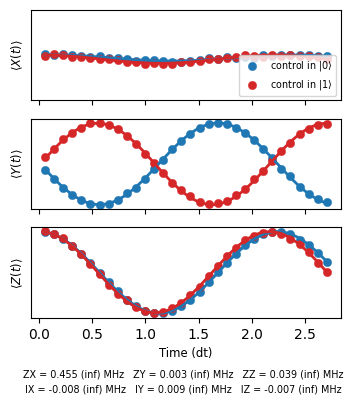

2024-10-25 18:43:11,722, MainThread 
INFO Tomography results for tomo_id1:
{'IX': -0.007500161372174991, 'IY': 0.008647983686761233, 'IZ': -0.007478307004565595, 'ZX': 0.45486858146796344, 'ZY': 0.002636075400616732, 'ZZ': 0.03863490087940024}

2024-10-25 18:43:11,722, MainThread 
INFO no need to update frequency offset for qubit [0, 1] at round 3
2024-10-25 18:43:11,722, MainThread 
INFO Remaining dominant error: IY: 0.008647983686761233 MHz

2024-10-25 18:43:11,722, MainThread 
INFO Successfully calibrated Qubits: [0, 1].
2024-10-25 18:43:11,723, MainThread 
INFO Finished qubits: [[0, 1]]
2024-10-25 18:43:11,727, MainThread 
INFO CR calibration data saved for qubits: [0, 1]


In [5]:
parallel_cr_pulse_calib(
    qubits=qubit_pairs,
    backend=backend,
    cr_times=cr_times,
    gate_name=gate_name,
    initial_calibration_data=initial_calibration_data_lst,
    verbose=True,
    restart=True,
    max_repeat=3,
    shots=2048,
    mode="CR",
)

In [4]:
# qubit_pairs = [[0,1], [3,4], [7,6], [10, 9], [17, 12]]
qubit_pairs = [[0,1], [3,4], [7, 6]]
initial_calibration_data_lst = []
for qubit_pair in qubit_pairs:
    QUBIT_C, QUBIT_T = qubit_pair[0], qubit_pair[1]
    cr_config, ix_config = get_default_cr_params(backend, qubit_pair[0], qubit_pair[1])
    f0 = backend.properties().frequency(QUBIT_C)
    f1 = backend.properties().frequency(QUBIT_T)
    a0 = backend.properties().qubit_property(QUBIT_C)["anharmonicity"][0]
    a1 = backend.properties().qubit_property(QUBIT_T)["anharmonicity"][0]
    duration = backend.defaults().instruction_schedule_map.get("ecr", (QUBIT_C, QUBIT_T)).duration/16 * 4
    params = {
        "order": "3",
        "t_r": 10,
        "drag_type": "exact",
        "duration": duration,
        "amp": cr_config["amp"],
        "angle": cr_config["angle"],
        "Delta": (backend.properties().frequency(QUBIT_C) - backend.properties().frequency(QUBIT_T)) * 1.0e-9 * 2 * pi,
        "a1": 2 * pi * backend.properties().qubit_property(QUBIT_C)["anharmonicity"][0] * 1.0e-9,
        "drag_scale": [1., 1., 1.]
    }
    cr_params = deepcopy(params)
    ix_params = deepcopy(params)
    ix_params["amp"] = ix_config["amp"]
    ix_params["angle"] = ix_config["angle"]
    ix_params["order"] = "2"
    initial_calibration_data = {
        "cr_params": cr_params,
        "ix_params": ix_params,
        "frequency_offset": 0.,
    }
    initial_calibration_data_lst.append(initial_calibration_data)
cr_times = 16 * np.arange(16, duration + 16, duration // 30, dtype=int)
gate_name = "CR-recursive-tr10"

2024-11-07 14:34:09,328, MainThread 
INFO Target IX / ZX ratio: 0.0
2024-11-07 14:34:09,330, MainThread 
INFO Target IX strength: [0. 0. 0.]
2024-11-07 14:34:09,330, MainThread 
INFO 

CR calibration round 1: 
2024-11-07 14:36:33,146, MainThread 
INFO Generated 192 tomography circuits.
/scr/dataset/yuchen/miniforge3/envs/calib/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/scr/dataset/yuchen/miniforge3/envs/calib/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
2024-11-07 14:37:35,099, MainThread 
INFO CR-tomo: cwpm208997wg008x7eq0 cwpm2105v39g008h06sg cwpm2185v39g008h06tg cwpm21r5v39g008h06vg cwpm220997wg008x7eqg cwpm22g2ac5g008hpdt

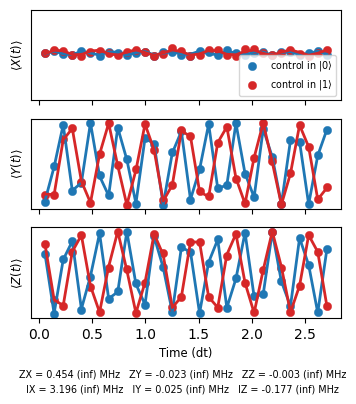

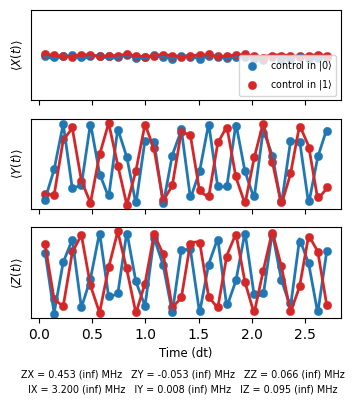

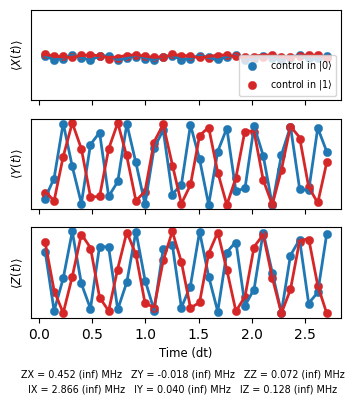

2024-11-07 14:43:09,816, MainThread 
INFO Tomography results for tomo_id1:
{'IX': 3.196177456148251, 'IY': 0.024962514903824652, 'IZ': -0.17729856604506677, 'ZX': 0.4539380315104897, 'ZY': -0.023481624800604613, 'ZZ': -0.0027640777220724394}

2024-11-07 14:43:09,816, MainThread 
INFO Tomography results for tomo_id1:
{'IX': 3.200015706519629, 'IY': 0.008053506865245584, 'IZ': 0.09490076939862496, 'ZX': 0.45274283966110956, 'ZY': -0.05277018956777551, 'ZZ': 0.06596511927582943}

2024-11-07 14:43:09,817, MainThread 
INFO Tomography results for tomo_id1:
{'IX': 2.8663331891428676, 'IY': 0.04008787298864355, 'IZ': 0.12770143170278905, 'ZX': 0.4517300528511595, 'ZY': -0.017754981620371067, 'ZZ': 0.07152907073310735}

2024-11-07 14:43:09,817, MainThread 
INFO Frequency offset is updated to 88649.28302253339 Hz
2024-11-07 14:43:09,818, MainThread 
INFO Remaining dominant error: IX: 3.196177456148251 MHz

2024-11-07 14:43:09,818, MainThread 
INFO Omega[GHz]/amp: 0.08357218055732558
2024-11-07 1

finished tomo_id2


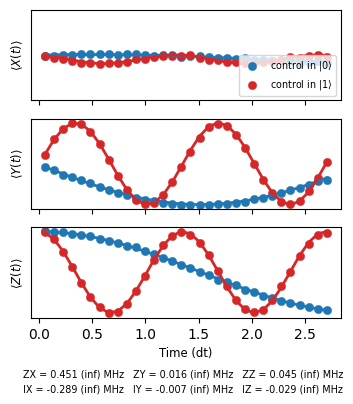

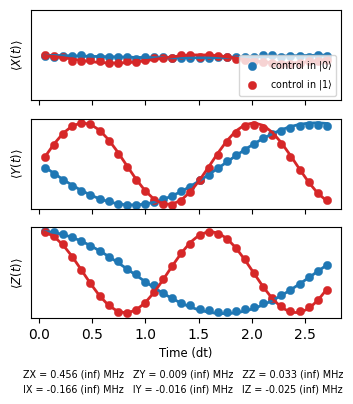

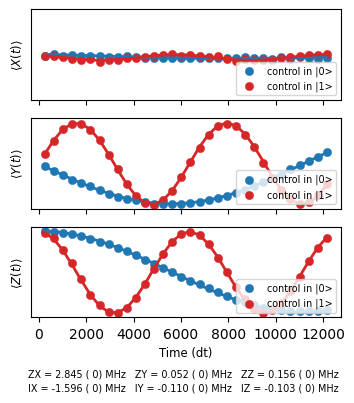

2024-11-07 14:52:15,994, MainThread 
INFO [{'IX': -0.2893821375777955, 'IY': -0.007318198431703806, 'IZ': -0.0293236881950774, 'ZX': 0.45096842844635193, 'ZY': 0.01647952126092285, 'ZZ': 0.0454649507715616}, {'IX': -0.16621245435153353, 'IY': -0.015804571140249496, 'IZ': -0.02503749612837342, 'ZX': 0.4558445943713073, 'ZY': 0.008811543194754332, 'ZZ': 0.033019737834669126}, {'IX': -1.5960180435459557, 'IY': -0.10971444432797517, 'IZ': -0.10284729946032457, 'ZX': 2.8448321509146584, 'ZY': 0.05248779118811667, 'ZZ': 0.15603394596177808}]
2024-11-07 14:52:46,705, MainThread 
INFO Estimated drive scale: 
(0.09113555485416085+0.0011428474519632394j)
(0.09114272027361384+2.2202714831712247e-19j)
0.012539426064657053
2024-11-07 14:53:17,271, MainThread 
INFO Estimated drive scale: 
(0.0945953107480448+0.0013398437635864704j)
(0.0946047990158532+0j)
0.014163008345910368
2024-11-07 14:53:47,560, MainThread 
INFO Estimated drive scale: 
(0.11692408403464735+0.004794185045040921j)
(0.117022329653

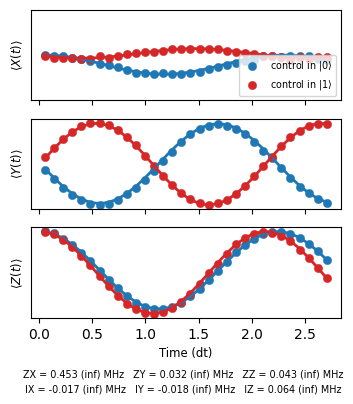

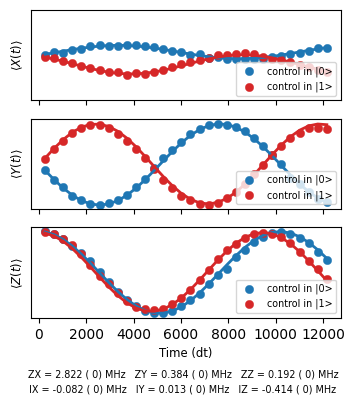

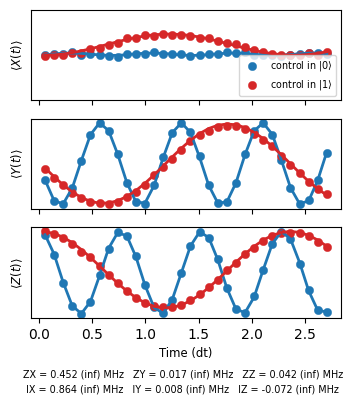

2024-11-07 15:01:14,530, MainThread 
INFO Tomography results for tomo_id1:
{'IX': -0.016949882382393307, 'IY': -0.018317803179776777, 'IZ': 0.06378420554865254, 'ZX': 0.45260508231652097, 'ZY': 0.032385261472575574, 'ZZ': 0.04302830288459124}

2024-11-07 15:01:14,531, MainThread 
INFO Tomography results for tomo_id1:
{'IX': -0.08156229825837835, 'IY': 0.012818877827432018, 'IZ': -0.41393308375855087, 'ZX': 2.8215403345037227, 'ZY': 0.3839257528922486, 'ZZ': 0.1921866032085573}

2024-11-07 15:01:14,531, MainThread 
INFO Tomography results for tomo_id1:
{'IX': 0.8638785438205666, 'IY': 0.007850952593916835, 'IZ': -0.07176331454384556, 'ZX': 0.45245790689649684, 'ZY': 0.01667331249652823, 'ZZ': 0.04170641857226989}

2024-11-07 15:01:14,532, MainThread 
INFO Frequency offset is updated to 56757.18024820712 Hz
2024-11-07 15:01:14,532, MainThread 
INFO Remaining dominant error: ZY: 0.032385261472575574 MHz

2024-11-07 15:01:14,533, MainThread 
INFO Omega[GHz]/amp: 0.09114272027361384
2024-11

finished tomo_id2


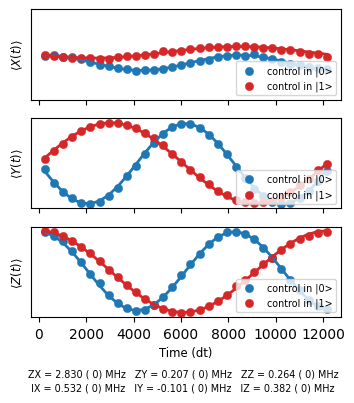

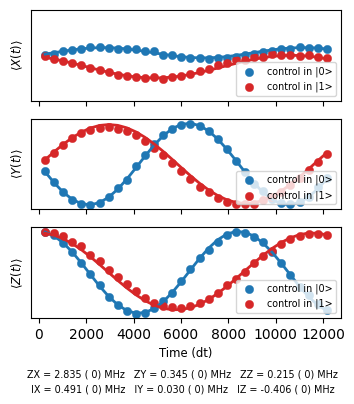

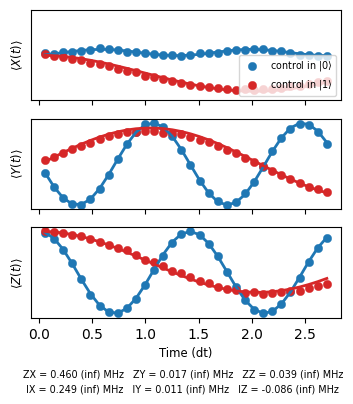

2024-11-07 15:10:46,709, MainThread 
INFO [{'IX': 0.5324308007218996, 'IY': -0.10055551211691324, 'IZ': 0.38159839832928055, 'ZX': 2.8295158841712658, 'ZY': 0.20709744049821674, 'ZZ': 0.26425622188827524}, {'IX': 0.49085438226270495, 'IY': 0.030281439158853507, 'IZ': -0.4059450378757648, 'ZX': 2.8349423577528814, 'ZY': 0.3451518331635799, 'ZZ': 0.21533014388982225}, {'IX': 0.2485004109668529, 'IY': 0.011201288020551772, 'IZ': -0.08571517937528515, 'ZX': 0.4595384804116047, 'ZY': 0.016798580898479926, 'ZZ': 0.0392332977994424}]
2024-11-07 15:11:23,804, MainThread 
INFO Estimated drive scale: 
(0.5009635375393-0.07331171333257j)
(0.5062993909295632+0j)
-0.14530996398986945
2024-11-07 15:12:05,230, MainThread 
INFO Estimated drive scale: 
(0.5414032026420713+0.020351675969187293j)
(0.5417855835529832-3.550206247938646e-18j)
0.03757291789971153
2024-11-07 15:12:41,460, MainThread 
INFO Estimated drive scale: 
(0.08336115033213774+0.0001648575791452375j)
(0.08336131334569212+0j)
0.001977628

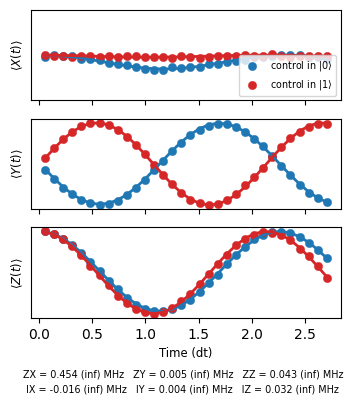

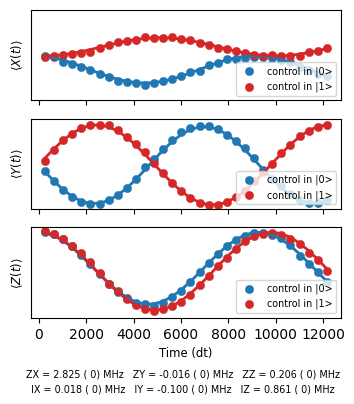

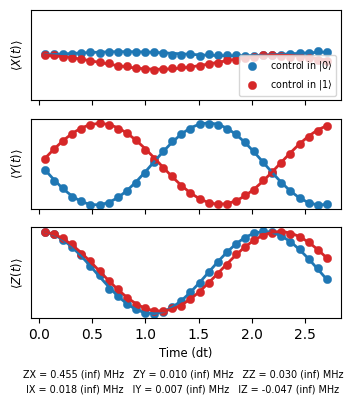

2024-11-07 15:20:10,561, MainThread 
INFO Tomography results for tomo_id1:
{'IX': -0.016325765347495306, 'IY': 0.003954985959721846, 'IZ': 0.03188698781298182, 'ZX': 0.4543432633499129, 'ZY': 0.005077820948986555, 'ZZ': 0.043488967960374}

2024-11-07 15:20:10,561, MainThread 
INFO Tomography results for tomo_id1:
{'IX': 0.017533005020849757, 'IY': -0.09979796322003275, 'IZ': 0.8614126592097493, 'ZX': 2.824885173917682, 'ZY': -0.016367774069590627, 'ZZ': 0.20597314146266593}

2024-11-07 15:20:10,562, MainThread 
INFO Tomography results for tomo_id1:
{'IX': 0.01820244239028826, 'IY': 0.007202285116018639, 'IZ': -0.04679645268372647, 'ZX': 0.45520182731698355, 'ZY': 0.00975378250244736, 'ZZ': 0.030267624236907268}

2024-11-07 15:20:10,562, MainThread 
INFO Frequency offset is updated to 40813.68634171621 Hz
2024-11-07 15:20:10,563, MainThread 
INFO Remaining dominant error: IX: 0.016325765347495306 MHz

2024-11-07 15:20:10,563, MainThread 
INFO Omega[GHz]/amp: 0.5062993909295632
2024-11-0

finished tomo_id2


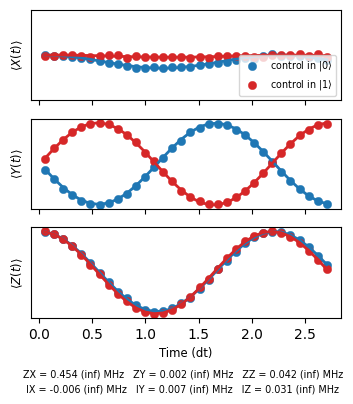

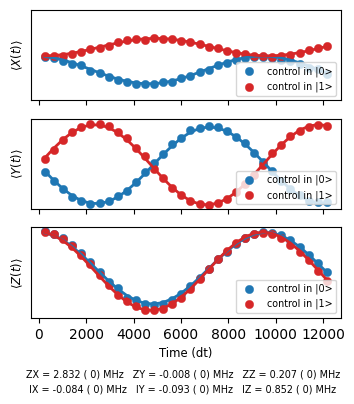

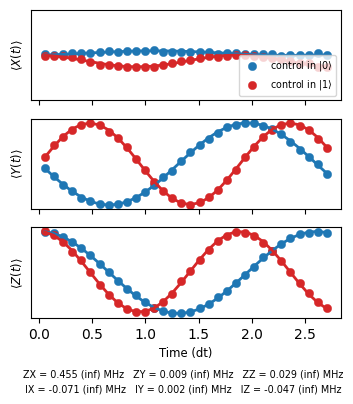

2024-11-07 15:30:06,201, MainThread 
INFO [{'IX': -0.0058232870619015185, 'IY': 0.007267412919330846, 'IZ': 0.03061795261504471, 'ZX': 0.45383447953953915, 'ZY': 0.0022622777390870364, 'ZZ': 0.04178955950234628}, {'IX': -0.08358274655882014, 'IY': -0.09261937293868826, 'IZ': 0.8524379149094161, 'ZX': 2.8320514825548475, 'ZY': -0.0076537373359684135, 'ZZ': 0.20747043979399682}, {'IX': -0.07085689454672407, 'IY': 0.002044722554785562, 'IZ': -0.047419121464915344, 'ZX': 0.45545202305037374, 'ZY': 0.008740026574075115, 'ZZ': 0.02855990850984245}]
2024-11-07 15:30:50,129, MainThread 
INFO Estimated drive scale: 
(0.05311871622459436+0.016945033704601774j)
(0.05575600578053519+0j)
0.3087983587319498
2024-11-07 15:31:25,698, MainThread 
INFO Estimated drive scale: 
(0.5480920390560382-0.03501537084738611j)
(0.5492093949234532+0j)
-0.06379922948065994
2024-11-07 15:32:05,988, MainThread 
INFO Estimated drive scale: 
(0.07420707852584948+0.00485029992927526j)
(0.07436542148569805-1.772574522376

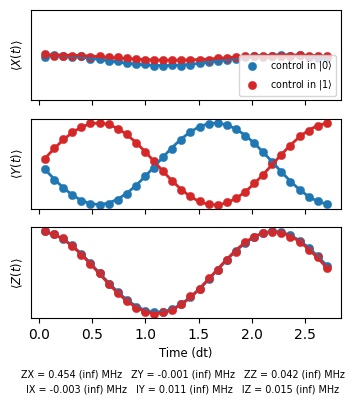

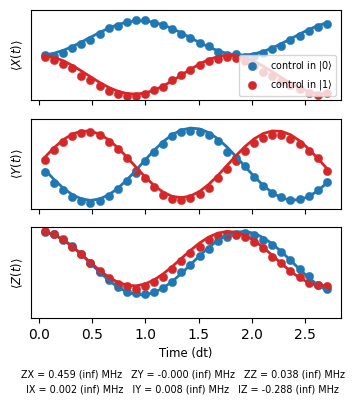

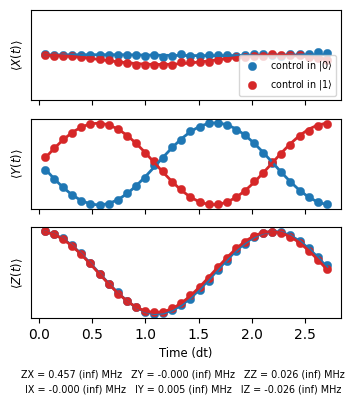

2024-11-07 15:43:49,339, MainThread 
INFO Tomography results for tomo_id1:
{'IX': -0.00259067534806269, 'IY': 0.010946640873827705, 'IZ': 0.015226001141139424, 'ZX': 0.453967093217125, 'ZY': -0.0005209193269420112, 'ZZ': 0.04228867472188411}

2024-11-07 15:43:49,340, MainThread 
INFO Tomography results for tomo_id1:
{'IX': 0.002182612576589358, 'IY': 0.007842905735371535, 'IZ': -0.2884286048503495, 'ZX': 0.4589485079443343, 'ZY': -0.00017921089973045278, 'ZZ': 0.0382402262179412}

2024-11-07 15:43:49,340, MainThread 
INFO Tomography results for tomo_id1:
{'IX': -0.0002073564006922357, 'IY': 0.0054879926228858815, 'IZ': -0.02596774440819241, 'ZX': 0.45691883352551343, 'ZY': -0.0003148269494253122, 'ZZ': 0.02611947349112645}

2024-11-07 15:43:49,341, MainThread 
INFO Frequency offset is updated to 33200.6857711465 Hz
2024-11-07 15:43:49,341, MainThread 
INFO Remaining dominant error: IY: 0.010946640873827705 MHz

2024-11-07 15:43:49,342, MainThread 
INFO Successfully calibrated Qubits: [

[[0, 1]]

In [5]:
parallel_cr_pulse_calib(
    qubits=qubit_pairs,
    backend=backend,
    cr_times=cr_times,
    gate_name=gate_name,
    initial_calibration_data=initial_calibration_data_lst,
    verbose=True,
    restart=True,
    max_repeat=3,
    shots=2048,
    mode="CR",
)